# Working with vector data: OGR

## Vector data

Sometimes, geospatial data is acquired and recorded for particular geometric objects such as polygons or lines. An example is a road layout, where each road is represented as a geometric object (a line, with points given in a geographical projection), with a number of added *features* associated with it, such as the road name, whether it is a toll road, or whether it is dual-carriageway, etc. This data is quite different to a raster, where the entire scene is tessellated into pixels, and each pixel holds a value (or an array of value in the case of multiband rasterfiles). 

If you are familiar with databases, vector files are effectively a database, where one of the fields is a geometry object (a line in our previous road example, or a polygon if you consider a cadastral system). We can thus select different records by writing queries on the features. Some of these queries might be spatial (e.g. check whether a point is inside a particular country polygon).

The most common format for vector data is the **ESRI Shapfile**, which is a multifile format (i.e., several files are needed in order to access the data). We'll start by getting hold of a shapefile that contains the countries of the world as polygons, together with information on country name, capital name, population, etc. The file is available [here](http://aprsworld.net/gisdata/world/world.zip).

![World](http://aprsworld.net/gisdata/world/political-world-aprs-small.png)

We will download the file with `wget` (or `curl` if you want to), and uncompress it using `unzip` in the shell:

We need to import `ogr`, and then open the file. As with GDAL, we get a handler to the file, (`g` in this case). OGR files can have different layers, although Shapefiles only have one. We need to select the layer using `GetLayer(0)` (selecting the first layer).

In [1]:
from osgeo import ogr

# have to make sure have access to gdal data files 
import os
if 'GDAL_DATA' not in os.environ:
    os.environ["GDAL_DATA"] = '/opt/anaconda/share/gdal'

g = ogr.Open( "world.shp" )
layer = g.GetLayer( 0 )

In order to see a field (the field `NAME`) we can loop over the features in the layer, and use the `GetField('NAME')` method. We'll only do ten features here:

In [2]:
n_feat = 0
for feat in layer:
    
    print(feat.GetField('NAME'))
    
    n_feat += 1
    if n_feat == 10:
        break

GUATEMALA
BOLIVIA
PARAGUAY
URUGUAY
SURINAME
FRENCH GUIANA
WESTERN SAHARA
GAMBIA
MOROCCO
MALI


If you wanted to see the different layers, we could do this using:

In [3]:
layerDefinition = layer.GetLayerDefn()


for i in range(layerDefinition.GetFieldCount()):
    print("Field %d: %s" % ( i+1, layerDefinition.GetFieldDefn(i).GetName() ))

Field 1: NAME
Field 2: CAPITAL
Field 3: APPROX
Field 4: AREA
Field 5: SOURCETHM


Each feature, in addition to the fields shown agove, will have a `Geometry` field. We get a handle to this using the `GetGeometryRef()` method. Geometries have many methods, such as `ExportToKML()` to export to KML (Google Maps/Earth format):

In [4]:
the_geometry = feat.GetGeometryRef()
the_geometry.ExportToKML()

'<Polygon><outerBoundaryIs><LinearRing><coordinates>-12.0443,14.669667 -11.87845,14.8252 -11.76455,15.039033 -11.63345,15.335633 -11.58515,15.634533 -11.52995,15.6713 -11.34705,15.6736 -11.26425,15.6529 -11.2125,15.549433 -11.1849,15.3092 -11.0503,15.097667 -10.9675,15.086167 -10.53275,15.365533 -9.70465,15.364367 -9.52175,15.373567 -9.4631,15.440233 -9.43205,15.619567 -9.37685,15.658667 -9.13185,15.656367 -9.1385,15.489433 -8.1165,15.487567 -6.83415,15.504167 -5.513,15.483867 -5.25265,16.2627 -5.2693,16.3033 -5.58505,16.439867 -5.63765,16.5635 -5.7623,17.728033 -5.8814,18.589933 -6.02265,19.525633 -6.1362,20.697567 -6.3107,21.8621 -6.4575,22.952833 -6.4686,23.543433 -6.52675,23.8627 -6.7123,24.997733 -5.05065,24.9834 -5.00065,24.982967 -4.51805,24.628633 -2.77295,23.4557 -2.17905,23.0869 -1.6281,22.7265 -0.5692,22.030967 0.6009,21.241133 1.0281,21.001933 1.10095,20.985233 1.21475,20.9807 1.21475,20.807767 1.24435,20.7486 1.40825,20.609033 1.5517,20.5514 1.6678,20.3724 1.9421,20.185067

Many of the methods that don't start with `__` are interesting. Let's see what these are. typically, the interesting methods start with an upper case letter, so we'll only show those:

In [5]:
for m in dir ( the_geometry ):
    if m[0].isupper():
        print(m)

AddGeometry
AddGeometryDirectly
AddPoint
AddPointM
AddPointZM
AddPoint_2D
Area
AssignSpatialReference
Boundary
Buffer
Centroid
Clone
CloseRings
Contains
ConvexHull
CoordinateDimension
CreatePreparedGeometry
Crosses
DelaunayTriangulation
Destroy
Difference
Disjoint
Distance
Distance3D
Empty
Equal
Equals
ExportToGML
ExportToIsoWkb
ExportToIsoWkt
ExportToJson
ExportToKML
ExportToWkb
ExportToWkt
FlattenTo2D
GetArea
GetBoundary
GetCoordinateDimension
GetCurveGeometry
GetDimension
GetEnvelope
GetEnvelope3D
GetGeometryCount
GetGeometryName
GetGeometryRef
GetGeometryType
GetLinearGeometry
GetM
GetPoint
GetPointCount
GetPointZM
GetPoint_2D
GetPoints
GetSpatialReference
GetX
GetY
GetZ
HasCurveGeometry
Intersect
Intersection
Intersects
Is3D
IsEmpty
IsMeasured
IsRing
IsSimple
IsValid
Length
MakeValid
Normalize
Overlaps
PointOnSurface
Polygonize
RemoveGeometry
RemoveLowerDimensionSubGeoms
Segmentize
Set3D
SetCoordinateDimension
SetMeasured
SetPoint
SetPointM
SetPointZM
SetPoint_2D
Simplify
Simplify

You'll notice that many of these mechanisms e.g. `Overlaps` or `Touches` are effectively geoprocessing operations (they operate on geometries and return `True` if one geometry overlaps or touches, respectively, the other). Other operations, such as `Buffer` return a buffered version of the same geometry. This allows you to actually do fairly complicated geoprocessing operations with OGR. However, if you want to do geoprocessing in earnest, you should really be using [Shapely](http://toblerity.org/shapely/manual.html). 


A particularly useful webpage for this section is [available in the OGR cookbook](http://pcjericks.github.io/py-gdalogr-cookbook/). Have a look through that if you want more in depth information.

## Selecting attributes and/or data extents

OGR provides an easy way to select attributes on a given layer. This is done using a SQL-like syntax (you can read more on [OGR's SQL subset here](http://www.gdal.org/ogr/ogr_sql.html). The main point is that the *attribute filter* is applied to a complete layer. For example, let's say that we want to select only countries with a population (field APPROX) larger than 90 000 000 inhabitants:

In [6]:
g = ogr.Open ( "world.shp" )
lyr = g.GetLayer( 0 )
lyr.SetAttributeFilter ( "APPROX > 90000000" )
for feat in lyr:
    print(feat.GetFieldAsString ( "NAME") + " has %d inhabitants" % \
        feat.GetFieldAsInteger("APPROX"))

PAKISTAN has 123490000 inhabitants
JAPAN has 124710000 inhabitants
RUSSIAN FEDERATION has 150500000 inhabitants
INDIA has 873850000 inhabitants
BANGLADESH has 120850000 inhabitants
BRAZIL has 159630000 inhabitants
NIGERIA has 91700000 inhabitants
CHINA has 1179030000 inhabitants
INDONESIA has 186180000 inhabitants
JOHNSTON ATOLL has 256420000 inhabitants
KINGMAN REEF - PALMYRA ATOLL has 256420000 inhabitants
UNITED STATES has 256420000 inhabitants


So we get a list of popoulous countries (note that Johnston Atoll and Palmyra are part of the US, and report the sample popuation as the US!)

An additional way to filter the data is by geographical extent. Let's say we wanted a list of all the countries in (broadly speaking) Europe, *i.e.* a geographical extent in longitude from 14W to 37E, and in latitude from 72N to 38N. We can use `SetSpatialFilterRect` to do this:

In [7]:
g = ogr.Open ( "world.shp" )
lyr = g.GetLayer( 0 )
lyr.SetSpatialFilterRect ( -14, 37, 38, 72)
for feat in lyr:
    print(feat.GetFieldAsString ( "NAME") + " ---- " + feat.GetFieldAsString ( "CAPITAL"))

ALGERIA ---- ALGIERS
BELGIUM ---- BRUSSELS
LUXEMBOURG ---- LUXEMBOURG
SAN MARINO ---- SAN MARINO
AUSTRIA ---- VIENNA
CZECH REPUBLIC ---- PRAGUE
SLOVENIA ---- LJUBLJANA
HUNGARY ---- BUDAPEST
SLOVAKIA ---- BRATISLAVA
YUGOSLAVIA ---- BELGRADE [BEOGRADE]
BOSNIA AND HERZEGOVINA ---- SARAJEVO
ALBANIA ---- TIRANE
MACEDONIA, THE FORMER YUGOSLAV REPUBLIC ---- SKOPJE
LITHUANIA ---- VILNIUS
LATVIA ---- RIGA
BULGARIA ---- SOFIA
BELARUS ---- MINSK
MOLDOVA, REPUBLIC OF ---- KISHINEV
IRELAND ---- DUBLIN
ICELAND ---- REYKJAVIK
SPAIN ---- MADRID
SWEDEN ---- STOCKHOLM
FINLAND ---- HELSINKI
TURKEY ---- ANKARA
RUSSIAN FEDERATION ---- MOSCOW
GREECE ---- ATHENS
PORTUGAL ---- LISBON
POLAND ---- WARSAW
NORWAY ---- OSLO
GERMANY ---- BERLIN
ESTONIA ---- TALLINN
TUNISIA ---- TUNIS
CROATIA ---- ZAGREB
ROMANIA ---- BUCURESTI
UKRAINE ---- KIEV
NETHERLANDS ---- AMSTERDAM
JERSEY ---- SAINT HELIER
GUERNSEY ---- SAINT PETER PORT
FAROE ISLANDS ---- TORSHAVN
DENMARK ---- COPENHAGEN
MONACO ---- MONACO
ANDORRA ---- ANDORRA

## Saving a vector file

Saving a vector file using OGR requires a number of steps:

1. Definition of the format
2. Definition of the layer projection and geometry type (e.g. lines, polygons...)
3. Definition of the data type of the different fields
4. Creation of a feature, population of the different fields, and setting a geometry
5. Addition of the feature to the layer
6. Destruction of the feature

This appears quite involved, but let's see how this works. Note that when you generate a new vector file, OGR will fail if the file already exists. You might want to use `os.remove()` to get rid of the file if it exists. 

Let's see how this is done with an example which is a snippet that creates a GeoJSON file with the location of the different national parks. GeoJSON is a nice geographic format, and [github allows you to display it easily as a map](https://github.com/blog/1528-there-s-a-map-for-that).

You can see the result of this on [github](https://gist.github.com/jgomezdans/6811102). 

Additionally, note that if we had defined a coordinate transformation as in the raster session, we could apply this transformation to an OGR geometry entity (in the snippet above, `p` would be such), and it would be reprojected.

**Exercise**
Modify the above snippet to output a GeoJSON file for the Peak District National Park, whose UTM30N ([EPSG code: 32630](http://spatialreference.org/ref/epsg/32630/)) co-ordinates are  $577659, 5911841$.

## Rasterising

A very frequent problem one finds is how to mask out an area in a raster file that is defined as polygon in a shapefile. For example, if you have a raster of the worlds population density, and you want to extract all the pixels that belong to one particular country, how do you go about that? One way around this is to *rasterise* the polygon(s), which translates into "burning" pixels that fall within the polygon with a number, resulting in a mask.

The way to do this is to use GDAL's `RasterizeLayer` method. The method takes a handle to a GDAL dataset (one that you create yourself, with the right projection and geotransform, as you've seen above), and a OGR layer. The syntax for `RasterizeLayer` is

    err = gdal.RasterizeLayer ( raster_ds, [raster_band_no], ogr_layer, burn_values=[burn_val] )
    
where `raster_ds` is the GDAL raster datasource (note that it needs to be georreferenced, *i.e.* it requires projection and geotransform), `raster_band_no` is the band of the GDAL dataset where we want to burn pixels, `ogr_layer` is the vector layer object, and `burn_val` is the value that we want to burn.

Let's use `gdal.RasterizeLayer` in conjunction with all that we have covered above. Say we want to create a mask that only selects the UK or Ireland in `world.shp`, and we want to apply this mask to the MODIS landcover product that we used in the GDAL session (h17v03 tile ), file `lc_h17v03.tif`. We find that in this case, `world.shp` is in longitude latitude, and the MODIS data is in the MODIS projection, so we will reproject the vector data to match the MODIS data (so the latter is not interpolated and artifacts introduced). To make this efficient and avoid saving to disk, we shall use *in-memory vector and rasters*, and we will output a numpy array as our mask. Note then the steps:

1. Crate the projection conversion object (as for GDAL before)
2. Create an in memory **raster** dataset to store the mask, using `lc_h17v03.tif` as a reference for geotransforms, array size and projection.
3. Create an in memory **vector** dataset to hold the features that will be reprojected
4. Open `world.shp` and apply an `AttributeFilter` to select a country
5. Select a geometry from `world.shp`, project it and store it in the destination in memory vector layer
6. Once this is done, use `gdal.RasterizeLayer` with both in-memory raster and vector datasets
7. Read the in memory raster into an array

This is a particularly good exercise that will stress all that we have learned so far.

In [8]:
#### Code will murder kernal. Requires debugging.

## Using matplotlib to plot geometries

Using matplotlib to plot geometries from OGR can be quite tedious. Here's an example of plotting a map of Angola from the `world.shp`. In the same vein of recommending Shapely and Fiona above for serious geoprocessing of vector data, you are encouraged to use [descartes](https://bitbucket.org/sgillies/descartes/) for plotting vector data!

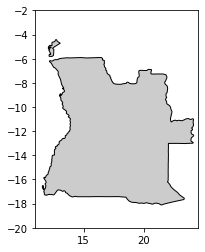

In [9]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from osgeo import ogr

# Extract first layer of features from shapefile using OGR
ds = ogr.Open('world.shp')
lyr = ds.GetLayer(0)


# Prepare figure
plt.ioff()
plt.subplot(1,1,1)
ax = plt.gca()


paths = []
lyr.ResetReading()

lyr.SetAttributeFilter ( " NAME = 'ANGOLA' ")
ax.set_xlim(11, 24.5 )
ax.set_ylim(-20, -2)
# Read all features in layer and store as paths

for feat in lyr:

    for geom in feat.GetGeometryRef():
        envelope = np.array( geom.GetEnvelope() )
        # check if geom is polygon
        if geom.GetGeometryType() == ogr.wkbPolygon:
            codes = []
            all_x = []
            all_y = []
            for i in range(geom.GetGeometryCount()):
                # Read ring geometry and create path
                r = geom.GetGeometryRef(i)
                x = [r.GetX(j) for j in range(r.GetPointCount())]
                y = [r.GetY(j) for j in range(r.GetPointCount())]
                # skip boundary between individual rings
                codes += [mpath.Path.MOVETO] + \
                             (len(x)-1)*[mpath.Path.LINETO]
                all_x += x
                all_y += y
            path = mpath.Path(np.column_stack((all_x,all_y)), codes)
            paths.append(path)
    # Add paths as patches to axes
    for path in paths:
        patch = mpatches.PathPatch(path, \
                facecolor='0.8', edgecolor='black')
        ax.add_patch(patch)



ax.set_aspect(1.0)
plt.show()